# Visualizing CNN Filters

Convolutional neural networks, have internal structures that are designed to operate upon two-dimensional image data, and as such preserve the spatial relationships for what was learned by the model. 
> Specifically, the two-dimensional filters learned by the model can be inspected and visualized to discover the types of features that the model will detect, and the activation maps output by convolutional layers can be inspected to understand exactly what features were detected for a given input image.

In neural network terminology, the learned filters are simply weights, yet because of the specialized two-dimensional structure of the filters, the weight values have a spatial relationship to each other and plotting each filter as a two-dimensional image is meaningful (or could be).

## Using VGG16 model

This is a good model to use for visualization because it has a simple uniform structure of serially ordered convolutional and pooling layers, it is deep with 16 learned layers, and it performed very well, meaning that the filters and resulting feature maps will capture useful features. For more information on this model, see the 2015 paper “Very Deep Convolutional Networks for Large-Scale Image Recognition.”

In [27]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.utils import plot_model
import matplotlib.pyplot as plt

In [28]:
model = VGG16()

In [29]:
model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

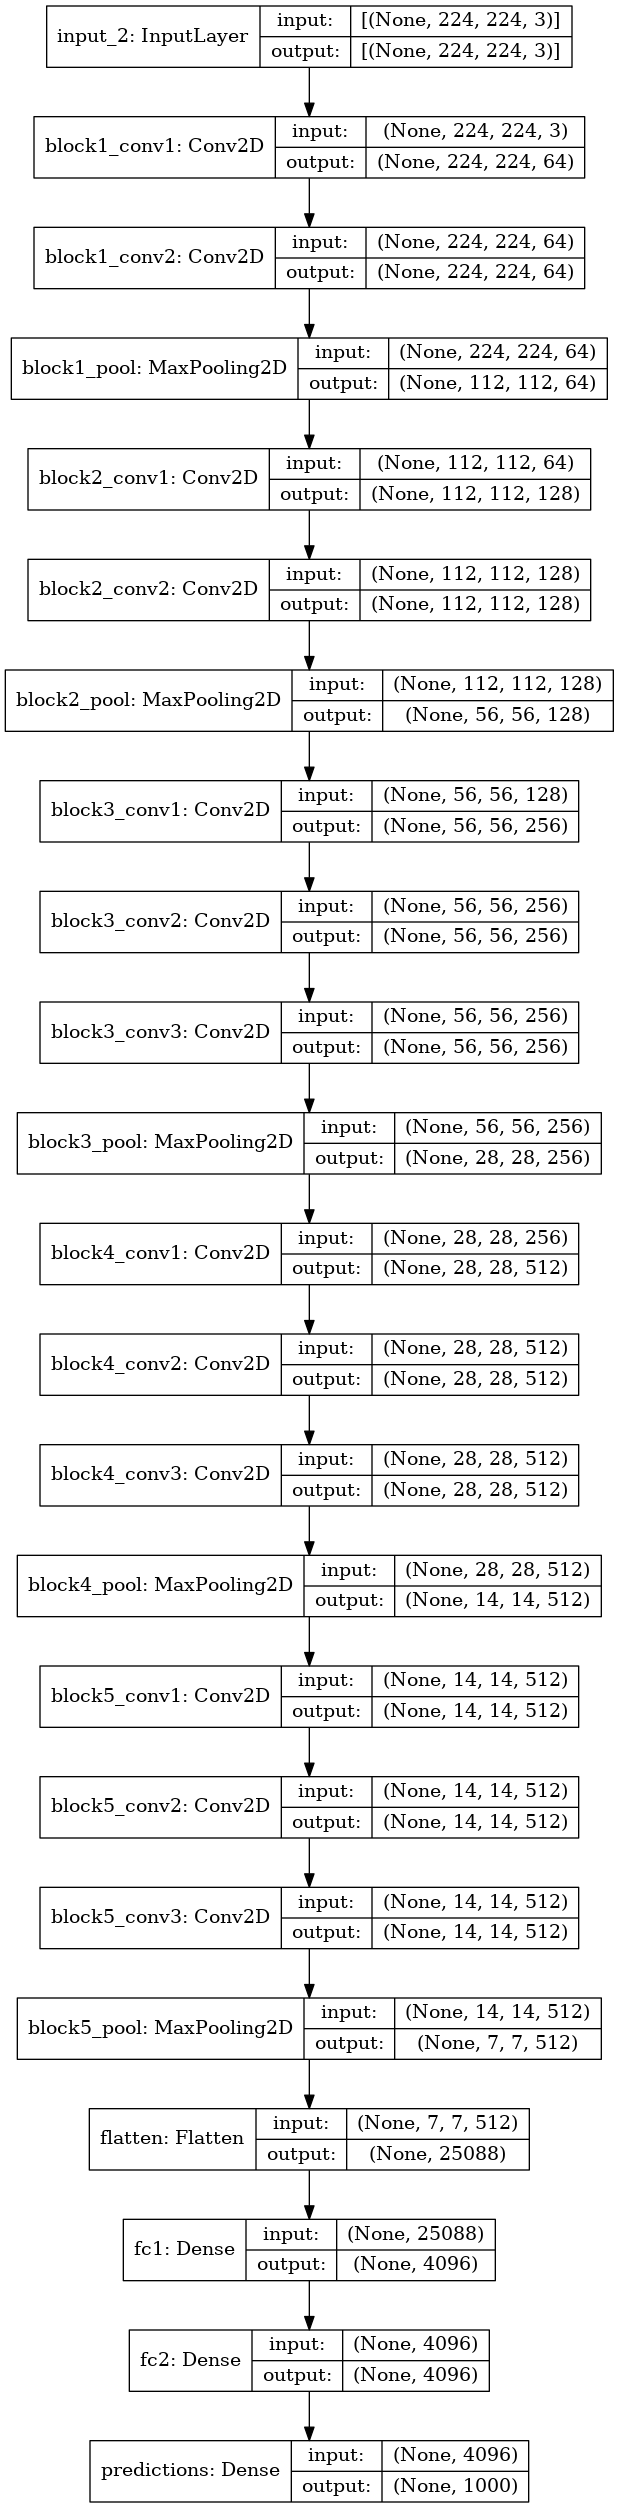

In [30]:
plot_model(model, show_shapes=True)

## Understanding the layers

We can access all of the layers of the model via the model.layers property.

Each layer has a layer.name property, where the convolutional layers have a naming convolution like __block#_conv#__, where the ‘#‘ is an integer. Therefore, we can check the name of each layer and skip any that don’t contain the string ‘conv‘.

Each convolutional layer has two sets of weights.

One is the block of filters and the other is the block of bias values. These are accessible via the layer.get_weights() function. We can retrieve these weights and then summarize their shape.

In [31]:
for layer in model.layers:
    if 'conv' not in layer.name:
        continue
    filter, baises = layer.get_weights()
    print(layer.name, filter.shape, baises.shape)

block1_conv1 (3, 3, 3, 64) (64,)
block1_conv2 (3, 3, 64, 64) (64,)
block2_conv1 (3, 3, 64, 128) (128,)
block2_conv2 (3, 3, 128, 128) (128,)
block3_conv1 (3, 3, 128, 256) (256,)
block3_conv2 (3, 3, 256, 256) (256,)
block3_conv3 (3, 3, 256, 256) (256,)
block4_conv1 (3, 3, 256, 512) (512,)
block4_conv2 (3, 3, 512, 512) (512,)
block4_conv3 (3, 3, 512, 512) (512,)
block5_conv1 (3, 3, 512, 512) (512,)
block5_conv2 (3, 3, 512, 512) (512,)
block5_conv3 (3, 3, 512, 512) (512,)


## Visualizing a filter

The weight values will likely be small positive and negative values centered around 0.0.

We can normalize their values to the range 0-1 to make them easy to visualize.

In [32]:
filters, biases = model.layers[1].get_weights()

In [33]:
f_min, f_max = filters.min(), filters.max()
print(f_min)
print(f_max)
print(filters)
filters = (filters - f_min)/(f_max - f_min)

-0.67140007
0.6085159
[[[[ 4.29470569e-01  1.17273867e-01  3.40129584e-02 ... -1.32241577e-01
    -5.33475243e-02  7.57738389e-03]
   [ 5.50379455e-01  2.08774377e-02  9.88311544e-02 ... -8.48205537e-02
    -5.11389151e-02  3.74943428e-02]
   [ 4.80015397e-01 -1.72696680e-01  3.75577137e-02 ... -1.27135560e-01
    -5.02991639e-02  3.48965675e-02]]

  [[ 3.73466998e-01  1.62062630e-01  1.70863140e-03 ... -1.48207128e-01
    -2.35300660e-01 -6.30356818e-02]
   [ 4.40074533e-01  4.73412387e-02  5.13819456e-02 ... -9.88498852e-02
    -2.96195745e-01 -7.04357103e-02]
   [ 4.08547401e-01 -1.70375049e-01 -4.96297423e-03 ... -1.22360572e-01
    -2.76450396e-01 -3.90796512e-02]]

  [[-6.13601133e-02  1.35693997e-01 -1.15694344e-01 ... -1.40158370e-01
    -3.77666801e-01 -3.00509870e-01]
   [-8.13870355e-02  4.18543853e-02 -1.01763301e-01 ... -9.43124294e-02
    -5.05662560e-01 -3.83694321e-01]
   [-6.51455522e-02 -1.54351532e-01 -1.38038069e-01 ... -1.29404560e-01
    -4.62243795e-01 -3.2398527

Now lets visualize the first 6 filters:

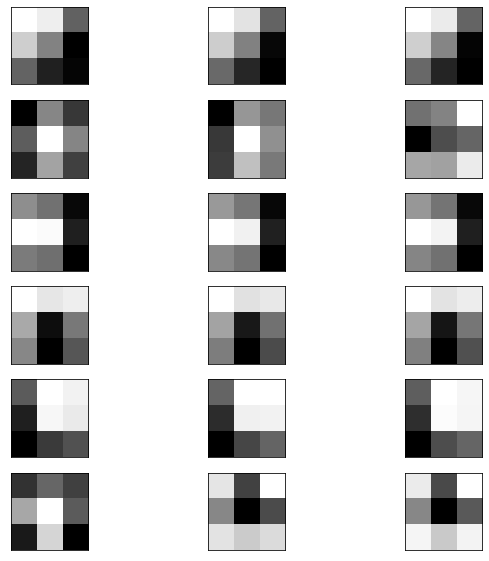

In [34]:
no_of_samples=6
ix=1
plt.figure(figsize=(10,10))
for i in range(no_of_samples):
    f = filters[:,:,:,i]
    for j in range(3):  # first filter is 3x3x3 i.e. 1 for each channel(RGB)
        subplot = plt.subplot(no_of_samples, 3, ix)
        subplot.set_xticks([])
        subplot.set_yticks([])
        plt.imshow(f[:,:,j], cmap='gray')
        ix+=1
plt.show()

If we try to infer these filters:
- (0,0) (top_left)-> looks like it tries to filter a bottom-right corner of a shape
- (0,1) -> similar to (0,0)
- (0,2) -> also similar to (0,0)
- (1,0) -> 
- (1,1) ->
- (1,2) ->
- (2,0) -> a straight line, most probably a right ended edge
- (2,1) -> same as (2,0)
- (2,2) -> same as (2,2)
:

# Visualizing feature Maps

The activation maps, called feature maps, capture the result of applying the filters to input, such as the input image or another feature map.

The idea of visualizing a feature map for a specific input image would be to understand what features of the input are detected or preserved in the feature maps. The expectation would be that the feature maps close to the input detect small or fine-grained detail, whereas feature maps close to the output of the model capture more general features.

Lets visualize multiple output layers of the model to understand what features are learned by the model

In [35]:
from tensorflow.keras import Model

In [39]:
layers = [1, 2, 5, 13, 17]
outputs = [model.layers[l+1].output for l in layers]
model_layers = Model(inputs=model.inputs, outputs=outputs)
model_layers.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

We will be visualizing the output for this input image
<img src='artifacts/bird.jpg' />

In [46]:
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.applications.vgg16 import preprocess_input
import numpy as np

In [42]:
img = load_img('artifacts/bird.jpg', target_size=(224, 224))
img = img_to_array(img)

In [44]:
print(img.shape)
img = np.expand_dims(img, axis=0)

(224, 224, 3)


In [45]:
print(img.shape)

(1, 224, 224, 3)


In [47]:
img = preprocess_input(img)

In [48]:
img.shape

(1, 224, 224, 3)

In [49]:
feature_map = model_layers.predict(img)

In [75]:
def print_shape(feats, s=0):
    if type(feats) == list:
        print('-'*s + str(len(feats)))
        for feat in feats:
            print_shape(feat, s+1)
    if type(feats) == np.ndarray:
        print('-'*s + str((feats).shape))

In [76]:
print_shape(feature_map)

5
-(1, 224, 224, 64)
-(1, 112, 112, 64)
-(1, 56, 56, 128)
-(1, 14, 14, 512)
-(1, 7, 7, 512)


Now lets plot these features maps to understand what features were extracted in each layer.

Note: we will only show 64 features for each layer

--------------------Layer-1--------------------


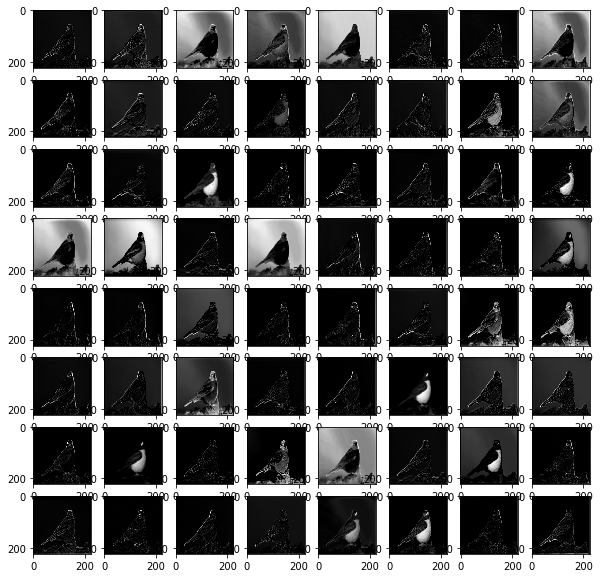

--------------------Layer-2--------------------


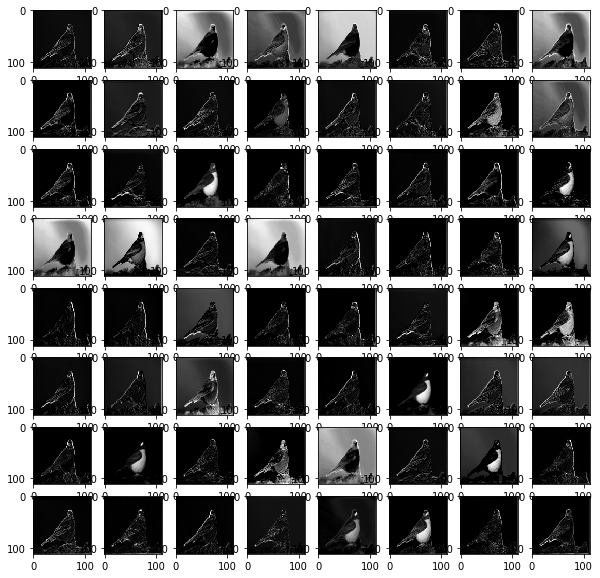

--------------------Layer-5--------------------


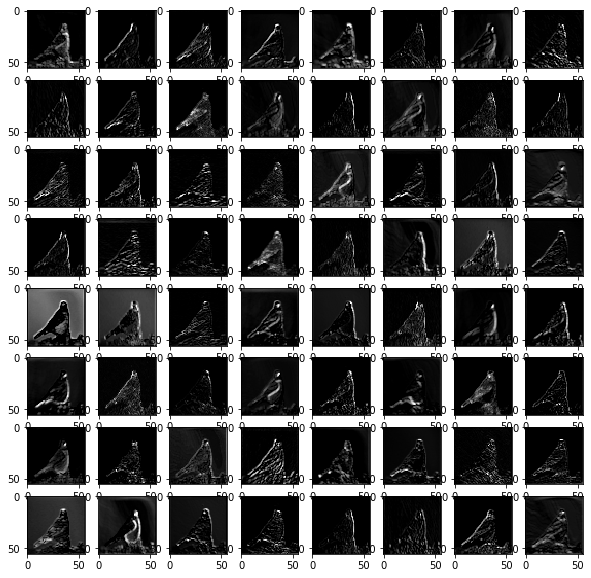

--------------------Layer-13--------------------


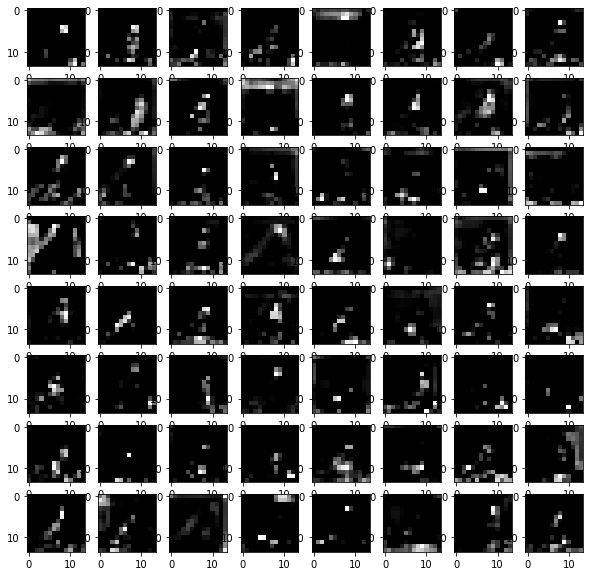

--------------------Layer-17--------------------


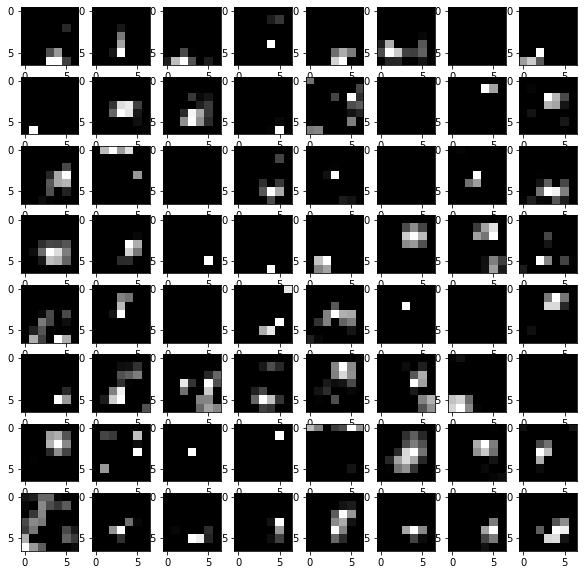

In [96]:
sq = 64
for f, fmap in enumerate(feature_map):
    plt.figure(figsize=(10,10))
    print('-'*20 + 'Layer-' + str(layers[f])+'-'*20)
    for i in range(sq):
        subplot = plt.subplot(sq**0.5, sq**0.5, i+1)
        # each map is a 4D vector with 1st dimension only containing 1 row
        # the 2nd and 3rd dimension comprises the feature map or activation map
        # the 4th dimension tells us the ith activation map
        # in our case we will show 0th to 63rd map
        subplot.imshow(fmap[0, :, :, i], cmap='gray') 
    plt.show()

We can see that the feature maps closer to the input of the model capture a lot of fine detail in the image and that as we progress deeper into the model, the feature maps show less and less detail.